# 3. Teoría de la estimación
# 3.1. Función de verosimilitud

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---

Algunas funciones de probabilidad y densidad y su definición en python

Las siguientes funciones se importan desde scipy.stats

```python
from scipy.stats import *
```

| Función                                                                                    | Nombre          | Comando en Python                | Argumentos                             |
| ------------------------------------------------------------------------------------------ | --------------- | -------------------------------- | -------------------------------------- |
| $p(x)=\binom{n}{k}p^k(1-p)^{n-k}$                                                          | Binomial        | `binom.pmf(k, n, p)`             | $n$=`n`, $k$=`k`, $p$=`p`              |
| $p(x) = \frac{{e^{ - \lambda } \lambda ^k }}{k!}$                                          | Poisson         | `poisson.pmf(k, mu, loc=0)`      | $k$=`k`, $\lambda$=`lambda`            |
| $p(x)=\frac{1}{b-a}$                                                                       | Uniforme[^1]    | `uniform.pdf(x, loc, loc+scale)` | $x$=`x`, $a$=`loc`, $b$=`loc+scale`    |
| $p(x)=\frac{1}{\sigma\sqrt{2\pi \sigma}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2} \right\} $ | Normal[^2]      | `norm.pdf(x, loc, scale)`        | $x$=`x`, $\mu$=`loc`, $\sigma$=`scale` |
| $p(x)=\lambda e^{-\lambda x};\ p(x)=\frac{1}{\lambda}e^{-x/\lambda}$                       | exponencial[^3] | `expon.pdf(x, loc, scale)`       | $x$=`x`, $\lambda$=`1/scale`           |

**Notas:**

[^1]: La función densidad uniforme por defecto tiene un rango entre [0, 1], pero con los argumentos `loc` y `scale` se pueden crear rangos [a, b].

[^2]: La normal por defecto tiene media, o $\mu$, de 0; y desviación estándar, $\sigma$, de 1, por lo que la función de densidad sería.
$$
  p(x)=\frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{x^2}{2}\right\}
$$

[^3]: La función de densidad exponencial tiene varias *parametrizaciones*. En `scipy.stats` la común es usando el parámetro `scale`, que es básicamente la desviación estándar (y, en la exponencial y en poisson, también la media). Esta parametrización por defecto corresponde a $p(x)=\frac{1}{\lambda}e^{-x/\lambda}$. El argumento `loc` no corresponde a un parámetro en particular de la exponencial, es simplemente una translación de la distribución. Por defecto es 0.

**Algunos ejemplos de uso de las funciones y su visualización**

Las líneas muestran la densidad/masa de probabilidad teórica, y los histogramas son calculados a partir de muestras aleatorias usando `fn.rvs` para las distintas funciones, con los parámetros definidos o, en caso de que no, los que vienen por defecto.

*Uniforme*

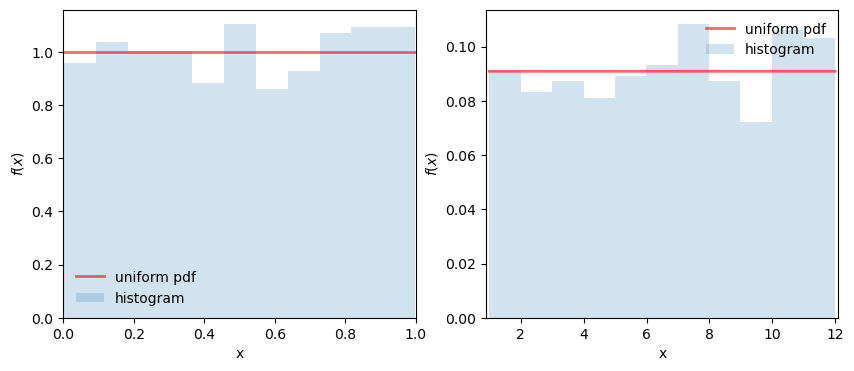

<Figure size 1000x10000 with 0 Axes>

In [1]:
from scipy.stats import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(5, 50), dpi=200)
x = np.linspace(0, 1, 200)
ax[0].plot(x, uniform.pdf(x),
           'r-', lw=2, alpha=0.6, label='uniform pdf')
r = uniform.rvs(size=1000)
ax[0].hist(r, density=True, bins='auto',
           histtype='stepfilled', alpha=0.2, label='histogram')
ax[0].set_xlim([x[0], x[-1]])
ax[0].set_xlabel('x')
ax[0].set_ylabel('$f(x)$')
ax[0].legend(loc='best', frameon=False)
# con loc y scale
loc = 1
scale = 11
x = np.linspace(loc, loc + scale, 2000)
ax[1].plot(x, uniform.pdf(x, loc, scale),
           'r-', lw=2, alpha=0.6, label='uniform pdf')
r = uniform.rvs(size=1000, loc=loc, scale=scale)
ax[1].hist(r, density=True, bins='auto',
           histtype='stepfilled', alpha=0.2, label='histogram')
ax[1].set_xlim([x[0] - 0.1, x[-1] + 0.1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('$f(x)$')
ax[1].legend(loc='best', frameon=False)
plt.show()


*Exponencial*

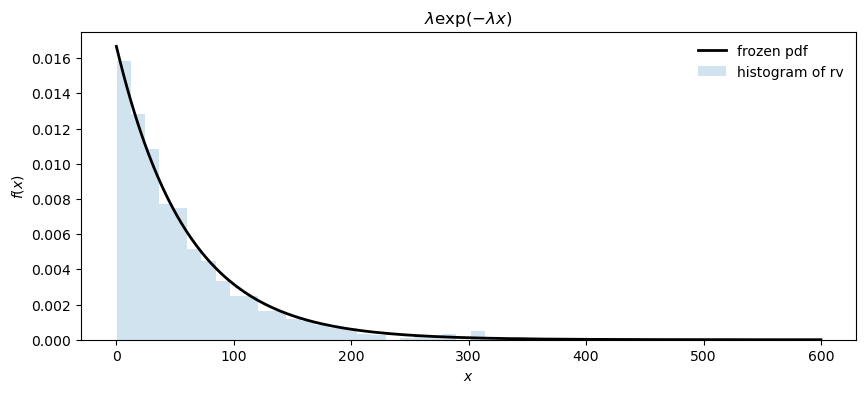

desviación estándar: 63.55;
media: 60.27


In [2]:
fig, ax = plt.subplots(1, 1)
λ = 1 / 60
x = np.linspace(0, 600, 200)
# variable aleatoria (random variate/variable, rv)
rv = expon(loc=0, scale=1 / λ)
# pdf a partir de la rv
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = rv.rvs(size=1000)
ax.hist(r, density=True, bins='auto',
        histtype='stepfilled', alpha=0.2, label='histogram of rv')
ax.legend(loc='best', frameon=False)
ax.set_title("$\\lambda\\exp(-\\lambda x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
plt.show()
print(f'desviación estándar: {np.std(rv.rvs(1000)).round(2)};\nmedia: {np.mean(rv.rvs(1000)).round(2)}')


*Normal*

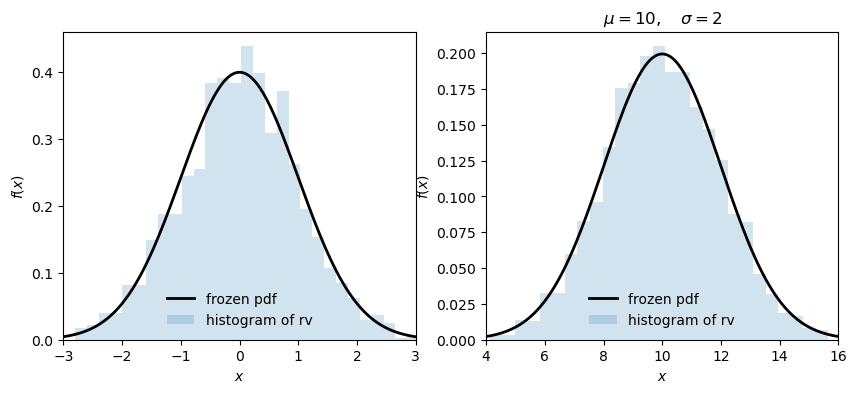

desviación estándar: 1.96


In [3]:
fig, ax = plt.subplots(1, 2)
x = np.linspace(-3, 3, 200)
rv = norm()
ax[0].plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax[0].hist(rv.rvs(size=2000), density=True, bins='auto', 
        histtype='stepfilled', alpha=0.2, label="histogram of rv")
ax[0].set_xlim([x[0], x[-1]])
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$f(x)$")
ax[0].legend(loc='best', frameon=False)
# con loc y scale diferentes
loc=10
scale=2
x = np.linspace(loc-3*scale, loc+3*scale, 200)
rv = norm(loc, scale)
ax[1].plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax[1].hist(rv.rvs(size=2000), density=True, bins='auto', 
        histtype='stepfilled', alpha=0.2, label="histogram of rv")
ax[1].set_xlim([x[0], x[-1]])
ax[1].set_title(f'$\\mu={{{loc}}},\\quad \\sigma={{{scale}}}$')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$f(x)$")
ax[1].legend(loc='best', frameon=False)
plt.show()
# desviación estándar de n=1000
print(f'desviación estándar: {np.std(rv.rvs(1000)).round(2)}')


## ¿Por qué?

>**Modelos de probabilidad** ¿Cuál es la probabilidad de observar los *datos* dado los *parámetros* que conocemos?

>**Modelos estadísticos**:  ¿Cuáles son los valores más *plausibles* de los *parámetros* dado los *datos* que observamos? (Notar que no dice "más probables").

<figure>
<p align="center">
  <img src="img/2022-08-29-21-59-31.png" width='40%' />
      <figcaption>Probabildad vs estadística</figcaption>
</p>
</figure>

**Ejemplo:**
¿Cuán probable es que obtengamos 9 "Caras" (1) si lanzamos una moneda "justa" ( $p=0.5$ ) 10 veces? 

La pregunta es sobre 10 lanzamientos, y cada uno de ellos es un experimento aleatorio, que da lugar a una VA discreta cuyos valores solo pueden ser dos, $\{0,1\}$ (por ejemplo). A cada uno de estos lanzamientos le llamamos *ensayo de Bernoulli* (un ensayo con resultados de tipo éxito/fracaso).

La VA discreta que resulta de los 10 lanzamientos tiene *distribución binomial*, que se usa para modelar el número de éxitos (e.g., valores en los que $X=1$) en una muestra aleatoria *con reemplazo* de tamaño $n$. 

Su distribución es

$$
  p(k, n, \theta) = \Pr(X = k) = \binom{n}{k}\theta^k(1-\theta)^{n-k}
$$

En donde $\binom{n}{k}$ es el coeficiente binomial

$$
  \binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

$n$ es el tamaño de la muestra (el total de ensayos), $k$ el número de éxitos, y $\theta$ un parámetro de la distribución que define la probabilidad de éxito (y por lo tanto, define la forma de la distribución y el valor más probable). Por ejemplo, si nuestra moneda es justa, tendrá una $\theta=0.5$. 

La media de una distribución binomial es $n\times \theta$, esto significa que si lanzamos 10 veces una moneda con $\theta=0.5$, el valor más probable de éxitos será $0.5\times 10 = 5$.

En python podríamos obtener la probabilidad que buscamos de la siguiente manera:

In [4]:
k=9
n=10
p=0.5
binom.pmf(k, n, p).round(3)

0.01

Es decir, la probabilidad de tener 9 éxitos, dado que $\theta=0.5, n=10$, es de apenas ~0.01, una probabilidad muy baja.

¿Cuál sería la probabilidad de conseguir 6 éxitos bajo las mismas asunciones?

In [5]:
k=6
n=10
p=0.5
binom.pmf(k, n, p).round(3)


0.205

¿Y dos éxitos?

In [6]:
binom.pmf(2, n, p).round(3)


0.044

La distribución de la binomial con estos parámetros tiene la siguiente forma

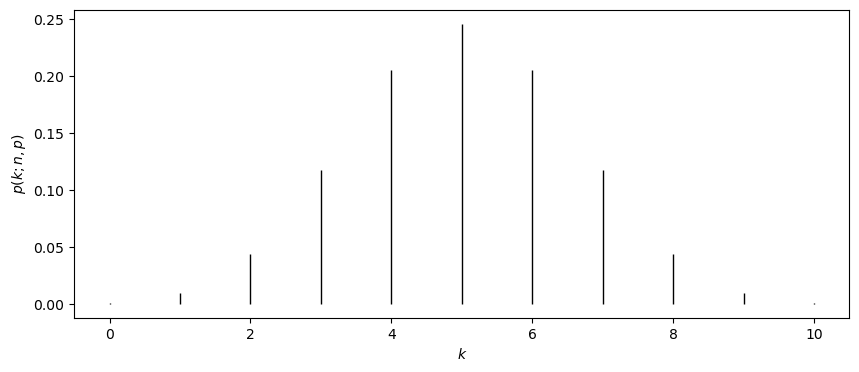

In [7]:
# par(las=1)
# options(repr.plot.width=7, repr.plot.height=5)
# exitos < - 0:10
# plot(
#     exitos,
#     dbinom(exitos, size=10, prob=.5),
#     type="h",
#     xlab="k",
#     ylab=expression(p(x == k, n, theta))
# )

fig, ax = plt.subplots(1, 1)
n=10
p=0.5
k=np.arange(0, 11, 1)
rv = binom(n, p)
ax.vlines(k, 0, rv.pmf(k), colors='k', linestyles='-', lw=1)
ax.set_xlabel('$k$')
ax.set_ylabel('$p(k;n,p)$')
plt.show()

La probabilidad de 9 éxitos es menor a la probabilidad de 2 y de 6 éxitos.

Valgan estos dos ejemplos para asumir lo siguiente:

>Si la distribución tiene fijo un parámetro ($\theta=0.5$), es más probable una cantidad de éxitos que otra (e.g., 6 éxitos vs 9 éxitos).

Ahora, supongamos que desconocemos $\theta$, pero obtenemos 9 éxitos en 10 lanzamientos. 

1. ¿Hay alguna forma de estimar el valor de $\theta$ que originó, o pudo haber originado, este resultado? 
2. Si tenemos la hipótesis de que $\theta\neq 0.5$, ¿hay una forma en la que podamos obtener evidencia de esta hipótesis?

A ambas la respuesta es sí, pero para contestarlo, necesitamos la función de verosimilitud.

## Función de verosimilitud $L(\theta \mid \mathbf{x})$

La letra $L$ proviene de *likelihood*, que en español se traduce normalmente como verosimilitud o inlcuso como *credibilidad*. 

Si tenemos una muestra aleatoria $X_1, X_2, \dots, X_n$, la función de verosimilitud se define como la función de densidad conjunta

$$
  L(\theta \mid \mathbf{x}) = f(x_1, x_2, \dots, x_n;\theta)
$$

Abreviaremos $L(\theta)$ simplemente como $L(\theta)$

>Nota: *parece* que estamos definiendo la función de verosimilitud como la función de densidad conjunta, pero hay una diferencia importante. La función de densidad conjunta toma como fijo $\theta$, y lo que varía es $\mathbf{x}$, pero en la función de verosimilitud $\mathbf{x}$ ya fue observado, por lo que es fijo, y consideramos que $\theta$ varía sobre todos los posibles valores. 

Si $X_1, X_2, \dots, X_n$ son muestras independientes e idénticamente distribuidas (i.i.d), la función de densidad conjunta es

$$
  f(X_1, X_2, \dots, X_n \mid \theta)=f(X_1\mid \theta)\times f(X_2\mid \theta)\times\cdots \times f(X_n\mid \theta) = \prod_{i=1}^{n}f(X_i\mid \theta) \tag{1}
$$

Notar que la función de densidad conjunta es equivalente al producto de la función de densidad de cada variable. Esto proviene de la definición de independencia: $A$ y $B$ son independientes *sii* $P(A, B)=P(A)P(B)$.

Y la función de verosimilitud

$$
  L(\theta) = \prod_{i=1}^{n}f(X_i\mid \theta) \tag{2}
$$

Para algunos problemas, la función de log-verosimilitud, $\mathcal{l}(\theta)$ es más conveniente, dado que es más sencillo de trabajar con sumas que con productos y, además, la transformación logarítmica es monotónica.

$$
  \mathcal{l}(\theta) = \log \prod_{i=1}^{n}f(X_i\mid \theta) = \sum_{i=1}^{n}f(X_i\mid \theta)\tag{3}
$$

La función de verosimilitud puede ser usada para cuantificar la evidencia que tenemos en favor de una hipótesis. Retomando el ejemplo de lanzamientos de monedas, ¿qué tan *creíble* o verosímil es que 9 de 10 lanzamientos hayan sido caras (éxitos) *dado que* $\theta=0.5$? ¿Es menos, o más creíble, haber obtenido 9/10 con un $\theta=0.5$?

Obtendremos primero la verosimilitud $L(\theta=0.5)$ para esta distribución. 

Considera una muestra aleatoria de $n=10$ ensayos de Bernoulli $x_1,\dots, n_{10}$, cada uno con distribución

$$
  f(x) = \theta^x(1-\theta)^{1-x}\quad \text{ con } x = 0,1
$$

La función de verosimilitud es

$$
  L(\theta) =f(x_1,\ldots,x_{10};\theta)= \prod_{i=1}^n\theta^{x_i}(1-\theta)^{1-x_i}=
  \theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}
$$

Dado que $\sum_{i=1}^{10} x_i = 9$, y $n=10$, $L(\theta)=\theta^9(1-\theta)^{10-9}$

Para $\theta=0.5$, $L(\theta=0.5)=0.5^9(1-0.5)=0.00097$. 

Para $\theta=0.9$,$L(\theta=0.9)=0.9^9(1-0.9)=0.038$.

Si obtenemos la razón de ambas, $L(\theta_2)/L(\theta_1)$ obtenemos un valor que nos dice cuántas veces más verosímil es $\theta_2$ vs $\theta_1$.

Gráficamente se vería así

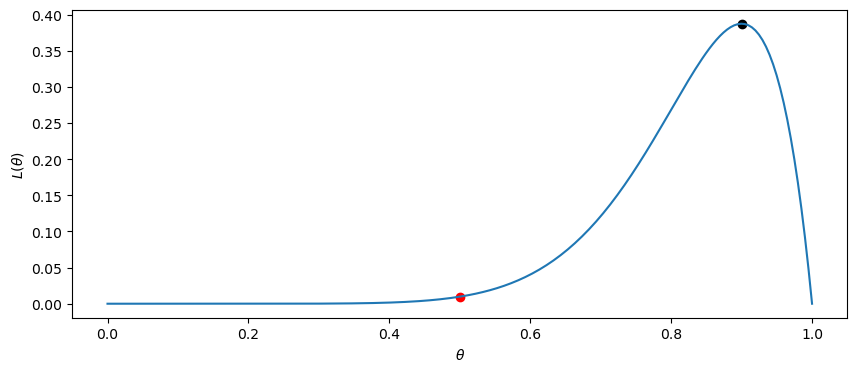

In [8]:
# éxitos obtenidos
k=9
# cantidad de ensayos
n=10
# hipótesis 1
p1=0.5
# hipótesis dos
p2=0.9
p_vec = np.linspace(0, 1, 200)
bin_like=binom.pmf(k, n, p_vec)
fig, ax = plt.subplots(1, 1)
ax.plot(p_vec, bin_like)
ax.scatter(p1, binom.pmf(k, n, p1), c='red')
ax.scatter(p2, binom.pmf(k, n, p2), c='black')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$L(\\theta)$')
plt.show()

# 3.2 Máxima verosimilitud

Hasta aquí la motivación del uso de las funciones de verosimilitud. Ahora veamos más formalmente la técnica para estimar parámetros, la estimación por máxima verosimilitud (EMV, y en inglés MLE). 

El problema de la MLE consiste en lo siguiente. Sea $X_1, X_2, \dots, X_n$ una muestra aleatoria de variables i.i.d. con distribución conjunta $L(\theta\mid X_1,\dots,X_n)$. El estimador de máxima verosimilitud de $\theta$ es la solución al problema de optimización

$$
  \theta^* = \argmax L(\theta\mid X_1,\dots,X_n ) \tag{4}
$$

En donde $\theta^*$ constituye el valor del argumento $\theta$ que maximiza $L$, es decir, el valor que maximiza la verosimilitud.

Caveat: este método impone una restricción fuerte, que es asumir que los datos siguen una distribución específica. 

## 3.2.1 MLE para binomial; obteniendo $\theta$

Como vimos gráficamente, $L$ para una binomial es cóncava. Podemos usar herramientas de cálculo para obtener $\theta^*$. Volvamos al ejemplo inicial, en donde usamos 10 lanzamientos y obtuvimos 9 éxitos. Vimos que podemos modelar este problema como 10 ensayos de Bernoulli independientes, que es lo mismo que una función de distribución Binomial.

$$
  p(X=k) = \binom{n}{k}\theta^k(1-\theta)^{n-k}
$$

La función de verosimilitud es la función de distribución conjunta. Para $X_1, X_2, \dots, X_n$ *i.i.d.*

$$
  L(\theta \mid X_1, X_2,\dots, X_n)=f(X_1, X_2, \dots, X_n\mid \theta) = \prod_{i=1}^nf(x_i\mid \theta)
$$

Y para la Binomial, como vimos, se convierte en 

$$
  L(\theta) = \theta^k (1-\theta)^{n-k}
$$

En donde $k$ son los éxitos, o $\sum_i x_i$. 

Si $L(\theta \mid X_1,...,X_n)$ es cóncava, el criterio de la primera derivada nos bastaría para encontrar $\theta^*$. Recordando la definición geométrica de la primera derivada, sabemos que encontramos un máximo o mínimo en donde la pendiente de una función es 0. Por lo tanto, queremos encontrar en dónde 

$$
  \frac{\text{d}L(\theta)}{\text{d}\theta}=0\tag{5}
$$

Antes de proseguir, podemos ver que en este caso transformar a $\log$ $L(\theta)$ podría simplificar las derivaciones. Dado que la transformación logarítmica es estrictamente creciente (monotónica), encontrar un máximo en $L$ es lo mismo que encontrarlo en $\log(L)$

$$
  \log(L(\theta)) = l(\theta) = \log \left [ \theta^k (1-\theta)^{n-k} \right]=\log\theta^k + \log(1-\theta)^{n-k}
$$

Ahora encontramos la primera derivada de $l(\theta)$

$$
  \frac{\text{d}l(\theta)}{\text{d}\theta} = \frac{\theta^k}{\text{d}\theta}+\frac{(1-\theta)^{n-k}}{\text{d}\theta}=k\text{d}\frac{\log(\theta)}{\text{d}\theta}+(n-k)\frac{\text{d}\log(1-\theta)}{\text{d}\theta}=\frac{k}{\theta}-\frac{n-k}{1-\theta}\tag{6}
$$

Igualar (6) a 0 y resolver para $\theta$.

$$
  \frac{k}{\theta}=\frac{1-\theta}{n-k}\Longrightarrow  n\theta-k\theta=k-k\theta\Longrightarrow n\theta=k\Longrightarrow \theta=\frac{k}{n}
$$

Dado que $k=\sum_i x_i$, es decir, la suma de los valores de $x_i$, entonces

$$
  \hat \theta = \frac{1}{n}\sum_{i=1}^nx_i \tag{7}
$$

En donde $\hat \theta$ es nuestro *sample proportion*, proporción muestral (por eso lleva el gorrito).

Para nuestor ejemplo, 

$$
  \hat\theta=\frac{9}{10}=0.9
$$

NOTA: El criterio de la primera derivada solo es una condición necesaria, no suficiente, para encontrar un máximo. Este método nos revela candidatos *posibles* a MLE.

### 3.2.2 Encontrando el MLE en R para una binomial

Vamos a hacer una primera aproximación numérica usando grid-search

/tmp/ipykernel_10710/2493164721.py:7: RuntimeWarning: divide by zero encountered in log
  return k * np.log(p) + (n - k) * np.log(1 - p) + np.log(m.comb(n, k))


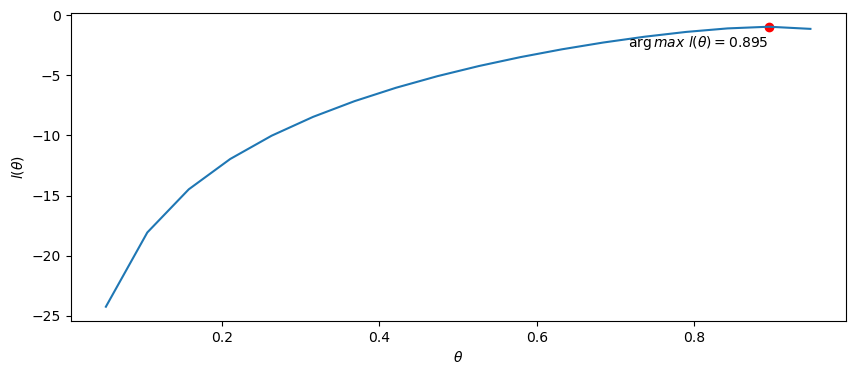

L(θ=0.5) = -4.63
L(θ=0.7) = -2.11
L(θ=0.9) = -0.95


In [9]:
import math as m
from scipy.optimize import minimize
from scipy.optimize import Bounds
# pmf para binomial

def binom_pmf(n, k, p):
    return k * np.log(p) + (n - k) * np.log(1 - p) + np.log(m.comb(n, k))

# optimización usando grid search
n = 10
k = 9
p = 0.5

step = 0.05
grid_vals = np.linspace(0, 1, int(1 / 0.05))
log_like = binom_pmf(n, k, p=grid_vals)
arg_max = np.argmax(log_like)
fig, ax = plt.subplots(1, 1)
ax.plot(grid_vals, log_like)
ax.scatter(grid_vals[arg_max], log_like[arg_max], c='red')
ax.text(grid_vals[arg_max] * 0.8, log_like[arg_max] * 2.8,
         s=f'$\\argmax\ l(\\theta)={{{round(grid_vals[arg_max], 3)}}}$')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$l(\\theta)$')
plt.show()

# # Evaluate the log-likelihood function for some arbitrary values
binom_pmf(p=0.5, n=10, k=9)
binom_pmf(p=0.7, n=10, k=9)
print(
    f'L(θ=0.5) = {binom_pmf(p=0.5, n=10, k=9).round(2)}\n'+\
    f'L(θ=0.7) = {binom_pmf(p=0.7, n=10, k=9).round(2)}\n'+\
    f'L(θ=0.9) = {binom_pmf(p=0.9, n=10, k=9).round(2)}'
)

En la práctica, este método puede ser muy costoso. Imaginar, por ejemplo, que se tiene que hacer una búsqueda para estimar 2 parámetros. Tendríamos que hacer combinaciones del grid de ambos parámetros. Este suele ser el método de fuerza bruta que se usa, en ocasiones, como primera aproximación o cuando no nos funciona ninguna otra cosa.

Es más eficiente usar un algoritmo de optimización, como `minimize` de `scipy.optimize`. En vez de maximizar, minimizaremos, por lo que la función cóncava la convertiremos en convexa multiplicando por -1.

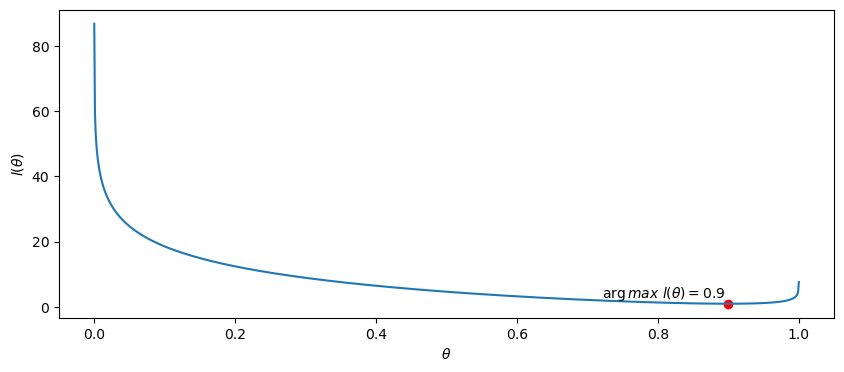

argmax = 0.9


In [15]:
# multiplicar por menos 1 la función de log-verosimilitud
def binom_pmf2(p, n, k):
    ll = k * np.log(p) + (n - k) * np.log(1 - p) + np.log(m.comb(n, k))
    return -ll
n = 10
k = 9
# valor inicial
theta = 0.2
# minimizar la función de log-verosimilitud negativa
# deben declararse los argumentos faltantes con args
# los argumentos son tomados en orden; theta es el p inicial
res = minimize(binom_pmf2, theta, args=(n, k),
               method='Nelder-Mead', bounds=[(0, 1)])

grid_vals = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(grid_vals, binom_pmf2(grid_vals, n, k))
ax.scatter(res.x, res.fun, c='red')
ax.text(res.x * 0.8, res.fun * 2.8,
         s=f'$\\argmax\ l(\\theta)={{{round(res.x[0], 3)}}}$')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$l(\\theta)$')
plt.show()

print(
    f'argmax = {res.x.round(3)[0]}'
)

## 3.2 MLE para normal; obteniendo $\mu$ con $\sigma$ conocida

Si $L$ es diferenciable en $\theta_i$, candidatos posibles para MLE son los valores $(\theta_1^*, \theta_2^*, \dots, \theta_k^*)$ que son la solución a 

$$
  \frac{\partial L(\theta)}{\partial\theta}=0
$$

De nuevo, esto solo es una condición necesaria, no suficiente, para encontrar MLEs. Por ello menciono "candidatos posibles".

Sea $X_1, \dots, X_n$ una *i.i.d.* normalmente distribuida con media $\theta$ y varianza de 1, es decir $X_i \sim \mathcal{N}(\theta, 1)$, y sea $L(\theta)$ la función de verosimilitud 

$$
  L(\theta)=\prod_{i=1}^n\frac{1}{(2\pi)^{1/2}}\exp \left\{ -\frac{1}{2}(x_i-\theta)^2 \right\}=\frac{1}{(2\pi)^{n/2}}\exp \left\{ -\frac{1}{2}\left(\sum_{i=1}^n(x_i-\theta)\right)^2 \right\}
$$

Hallar $\theta^*=\argmax L(\theta)$

Pasos: 
1. log-transformar para obtener una versión más sencilla. 
2. Obtener $l'(\theta)$. 
3. Igualar a 0 y resolver para $\theta$.

Paso 1

$$
  l(\theta) = \log \left[ \frac{1}{(2\pi)^{n/2}}\exp \left\{ -\frac{1}{2}\left(\sum_{i=1}^n(x_i-\theta)\right)^2 \right\} \right]=\log\frac{1}{(2\pi)^{n/2}}+\log\left[\exp \left\{ -\frac{1}{2}\left(\sum_{i=1}^n(x_i-\theta)\right)^2 \right\}\right]
$$

Dado que $\log(\exp^x)=x$

$$
  l(\theta)=\log\frac{1}{(2\pi)^{n/2}}-\frac{1}{2}\left(\sum_{i=1}^n(x_i-\theta)\right)^2
$$

Paso 2

Ahora econtramos la primera derivada con respecto a $\theta$

$$
  l'(\theta)=\frac{\text{d}}{\text{d}\theta}\log\frac{1}{(2\pi)^{n/2}}-\frac{1}{2}\frac{\text{d}}{\text{d}\theta}\sum_{i=1}^n(x_i-\theta)^2
$$

Dado que el primer término no depende de $\theta$, se elimina. Para el segundo término, notando que una derivada de una sumatoria es la suma de sus derivadas, y usando la regla $du^n/du=ndu$ nos queda

$$
  l'(\theta)= 0 - \frac{1}{2}\left(2\sum_{i=1}^n(x_i-\theta)(-1)\right)=\sum_{i=1}^n(x_i-\theta)
$$

Paso 3

Ahora igualamos a 0y resolvemos para $\theta$

$$
  \sum_{i=1}^n(x_i-\theta)=0\Longrightarrow \sum_{i=1}^nx_i=\sum_{i=1}^n\theta
$$

Notar que la n-suma de una constante $\theta$ es $n\theta$.

$$
  \sum_{i=1}^nx_i=\sum_{i=1}^n\theta=n\theta\Longrightarrow \hat\theta=\frac{1}{n}\sum_{i=1}^nx_i
$$

---

**Ejercicio de práctica solos:**

Encontrar $\theta_1$ y $\theta_2$ tal que $\hat \theta_1=\bar x, \hat \theta_2 = \hat\sigma^2$ para la distribución normal

$$
  f(x_i;\theta_1, \theta_2)=\frac{1}{(\theta_2 2\pi)^{1/2}} \exp\left\{ -\frac{1}{2\theta_2}(x_i-\theta_1)^2 \right\}
$$

Nota: la distribución normal a veces es parametrizada con la desviación estándar, $\sigma$, y a veces con la varianza, $\sigma^2$. Esto se puede notar en los denominadores de ambos términos de la función que acabo de colocar.